# Upgrading Scikit Learn Library

In [ ]:
!pip install scikit-learn==1.5.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 41.3 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


# Importing Dependencies & Dataset

Importing the Dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Data Collection

In [ ]:
# loading the house price dataset to a pandas dataFrame
gold_data = pd.read_csv('/content/Project 8. Gold Price Data.csv')

# Exploratory Data Analysis

In [ ]:
# first 5 rows in the dataset
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
# last 5 rows in the dataset
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [ ]:
# number of rows & columns
gold_data.shape

(2290, 6)

In [ ]:
# getting info about the dataset
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [ ]:
# checking null values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [ ]:
# getting the stats about dataset
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [ ]:
#setting the figure parameters
plt.rcParams['figure.dpi'] = 100

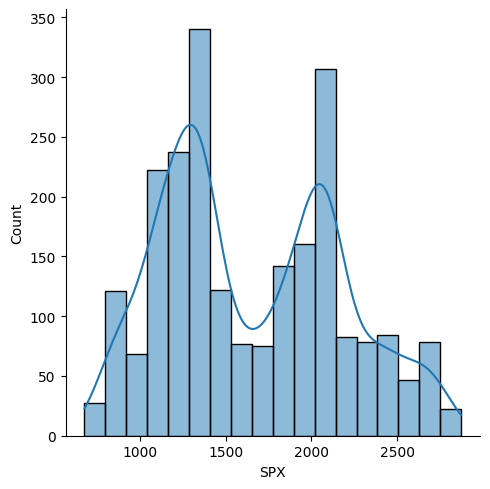

In [ ]:
# distribution plot for year
sns.displot(data=gold_data, x = 'SPX', kde=True)

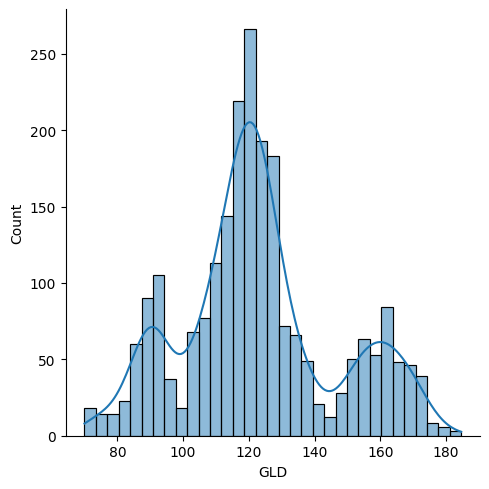

In [ ]:
# distribution plot for year
sns.displot(data=gold_data, x = 'GLD', kde=True)

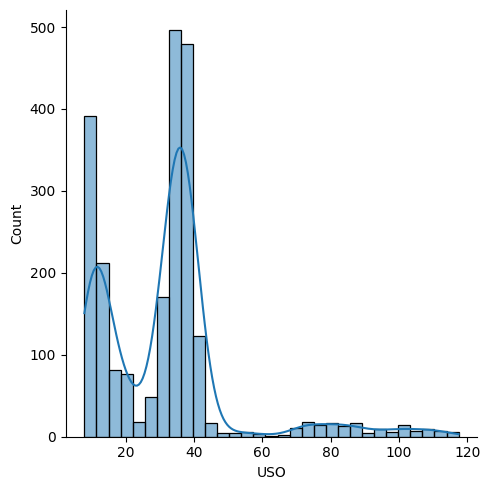

In [ ]:
# distribution plot for year
sns.displot(data=gold_data, x = 'USO', kde=True)

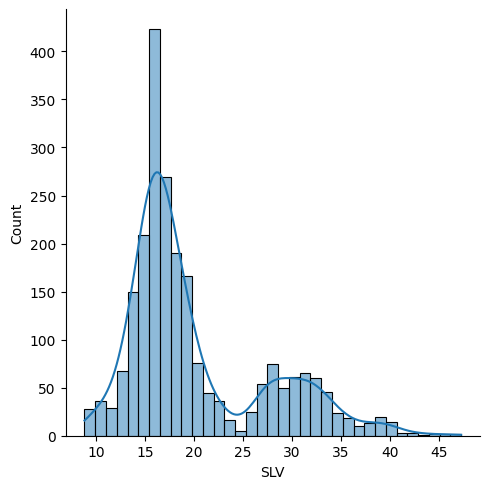

In [ ]:
# distribution plot for year
sns.displot(data=gold_data, x = 'SLV', kde=True)

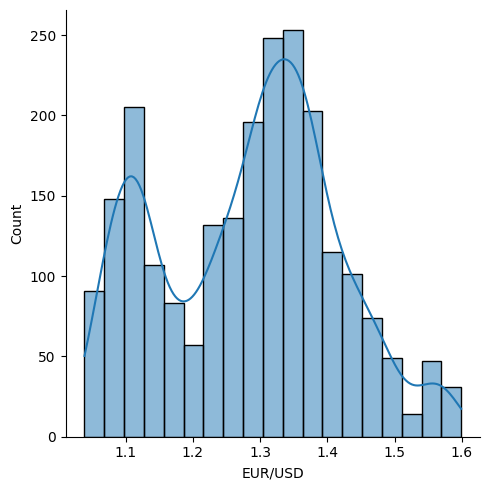

In [ ]:

# distribution plot for year
sns.displot(data=gold_data, x = 'EUR/USD', kde=True)

In [ ]:
gold_data.drop(columns=['Date'],axis=1,inplace=True)

In [ ]:
#setting the figure parameters
plt.rcParams['figure.figsize'] = (20, 10)
plt.rcParams['figure.dpi'] = 200

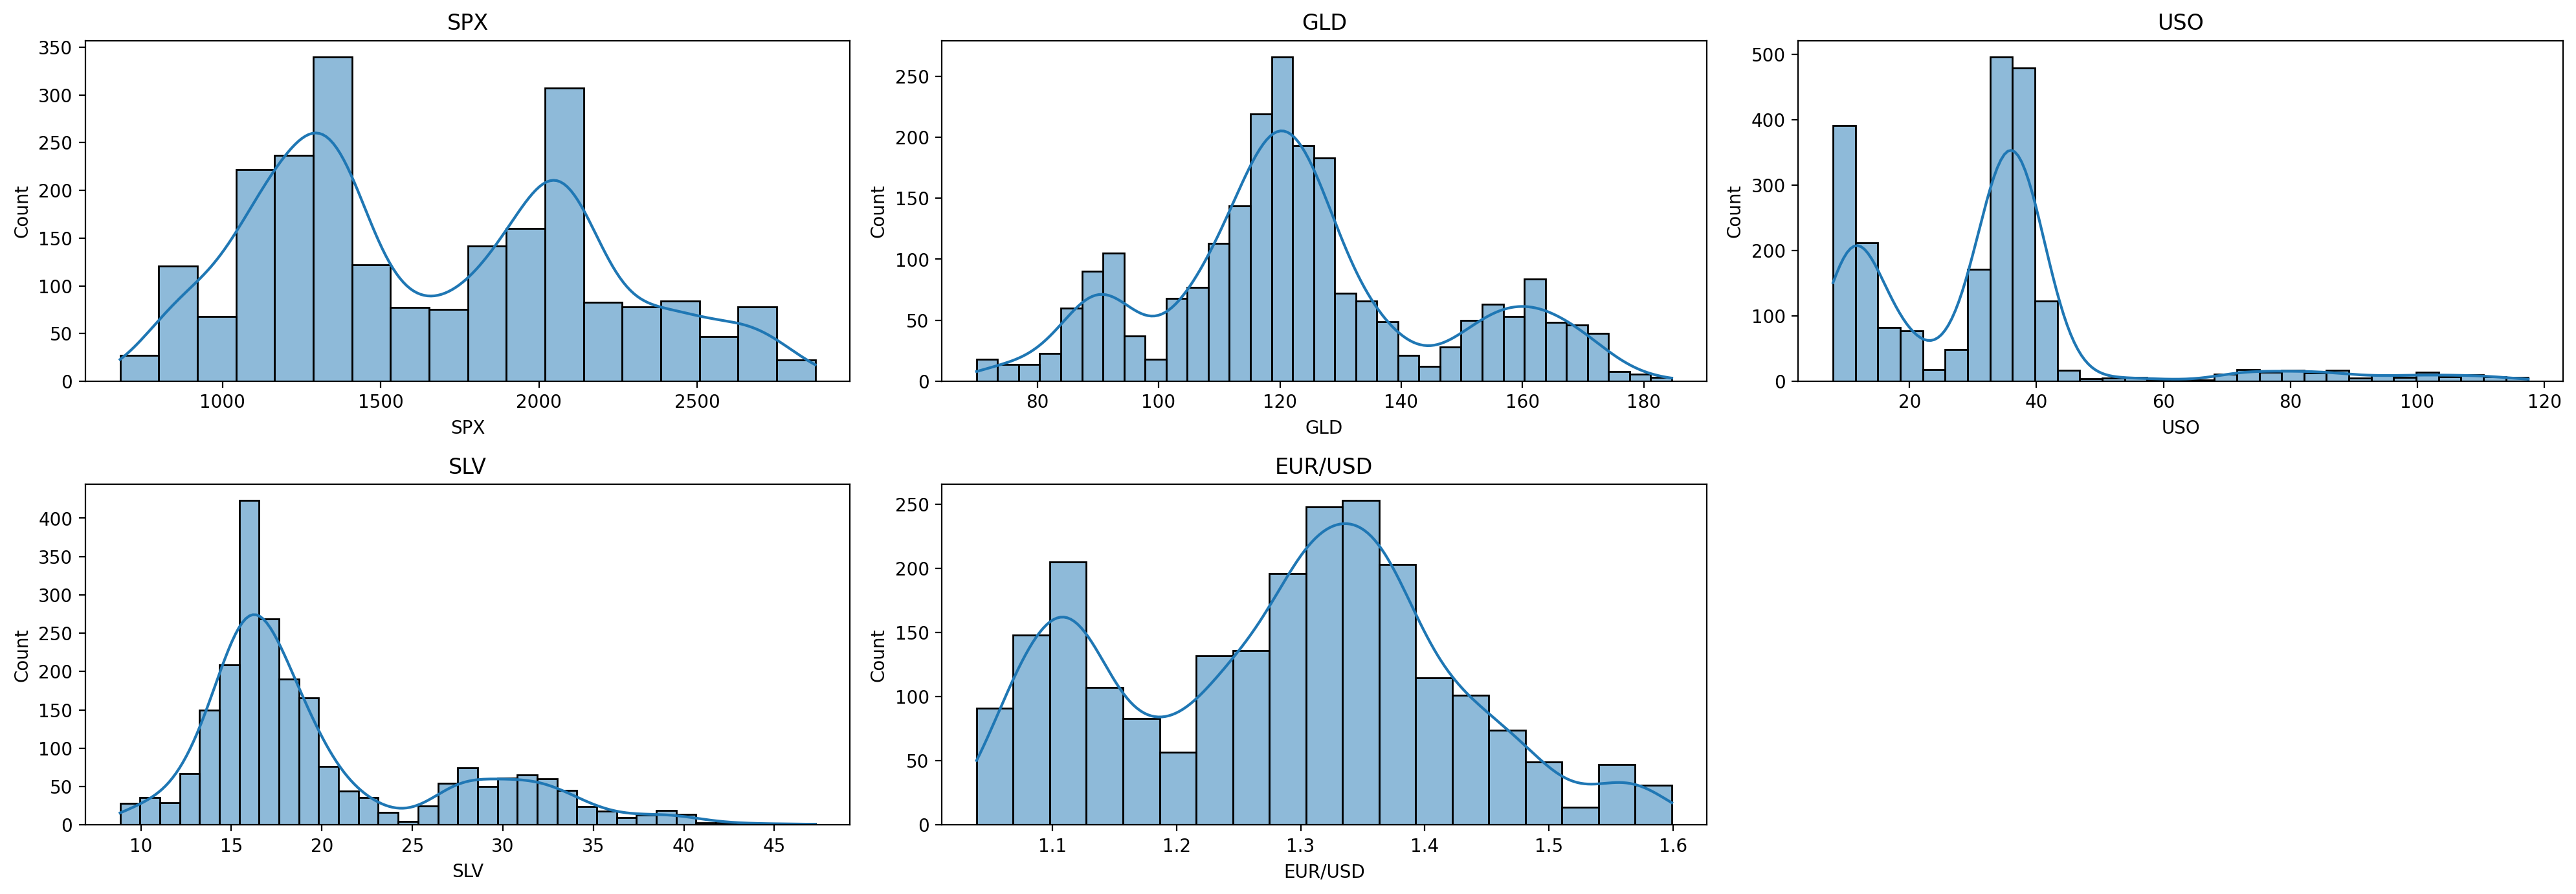

In [ ]:
#plotting the histplot for each column in dataset using subplots
columns = gold_data.columns
for i, col in enumerate(columns):
    plt.subplot(3,3, i+1)
    if gold_data[col].dtype == 'object':
        sns.countplot(x=col, data=gold_data,hue=col)
    else:
      sns.histplot(x=col, data=gold_data,kde=True)
    plt.xlabel(col)
    plt.title("{}".format(col))
    plt.tight_layout()

<Axes: >

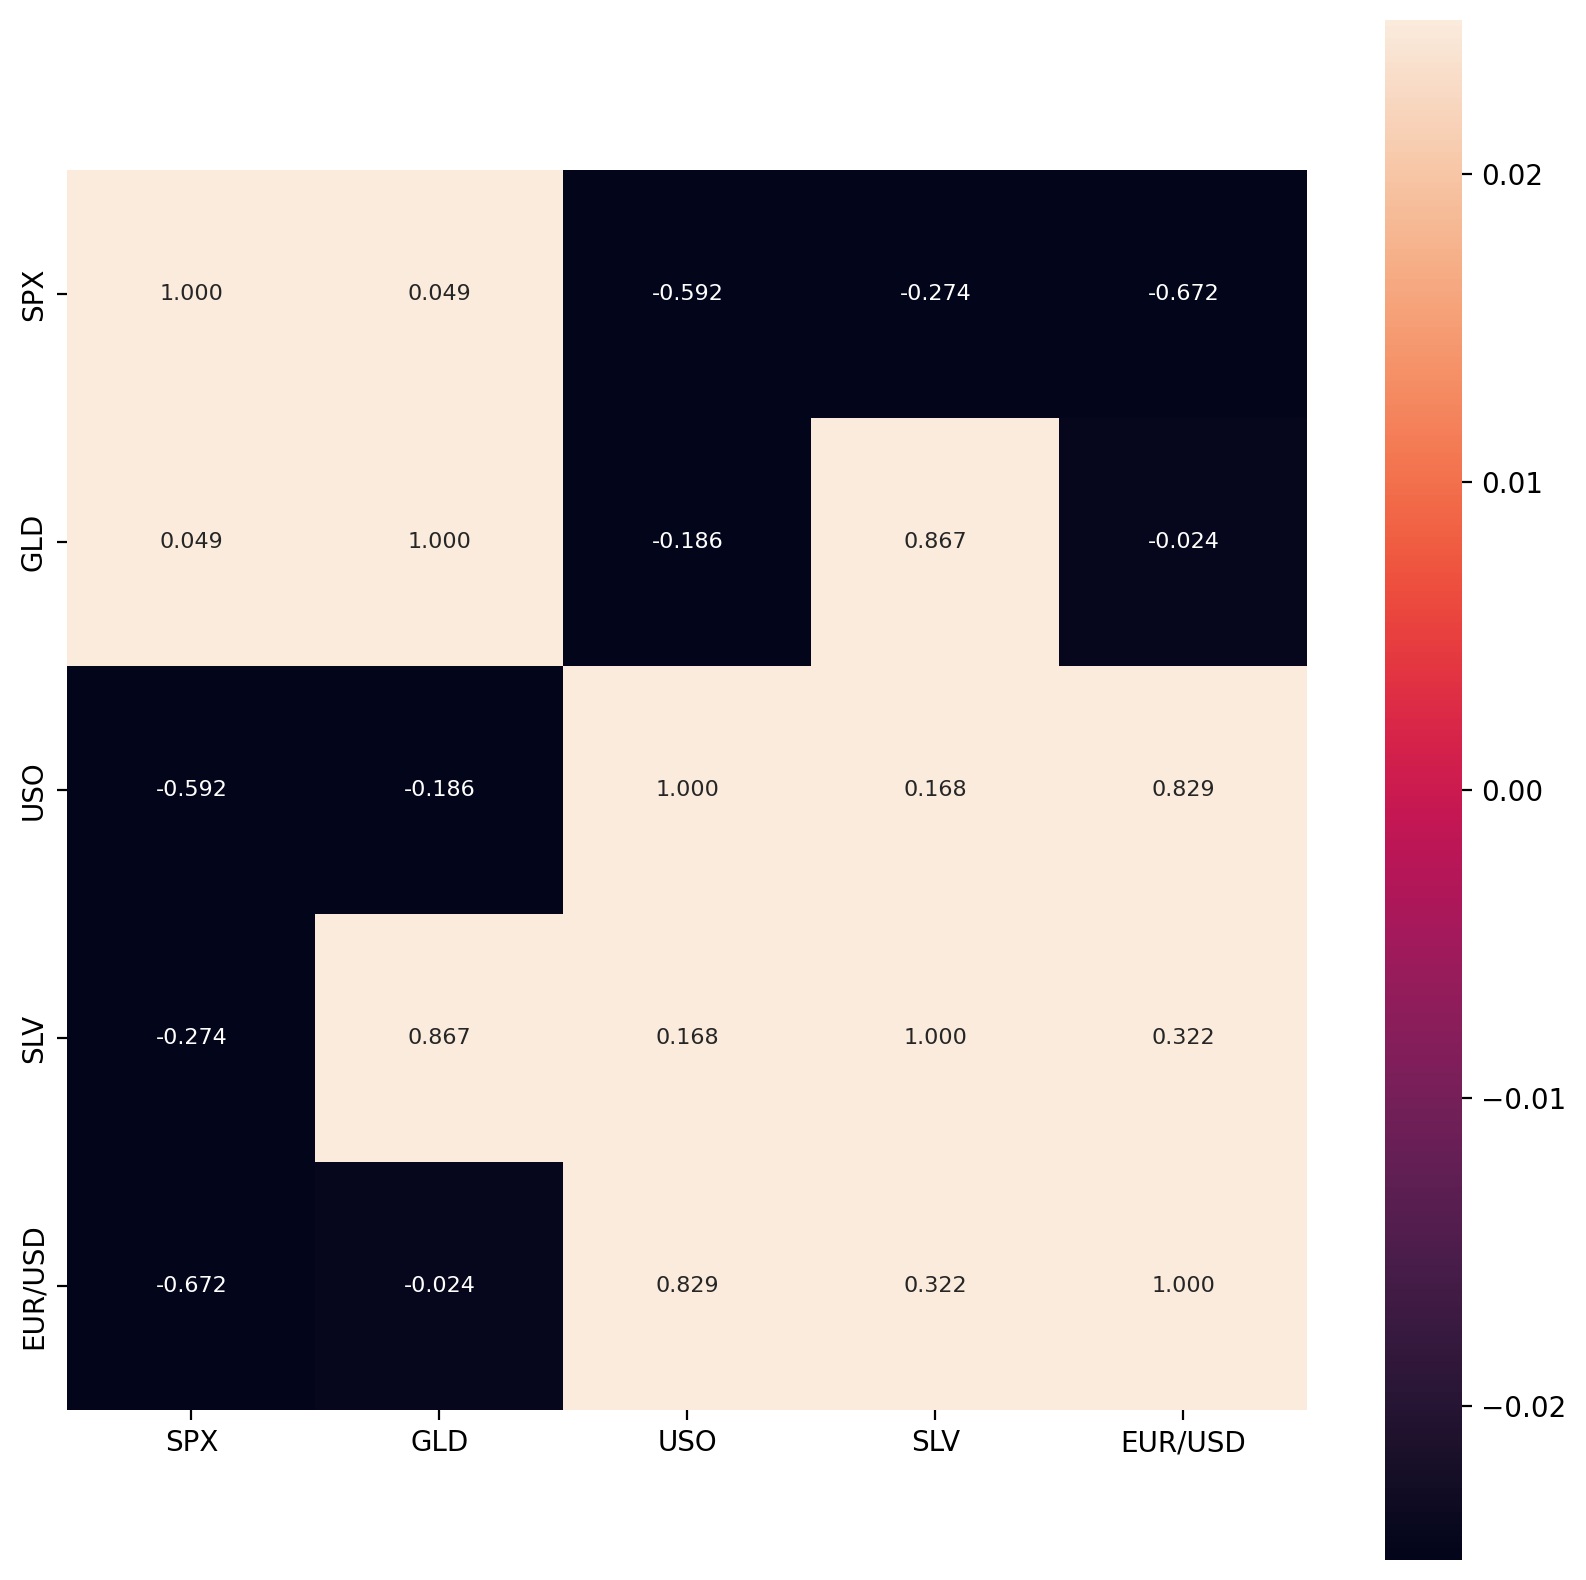

In [ ]:
# constructing a heat map to understand correlation
correlation = gold_data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, vmin=-0.025 , vmax=0.025,cbar=True,square=True,annot=True,fmt='.3f', annot_kws={'size':8})

# Data Preprocessing & Splitting

Replacing the outliers with mean values according to target

In [ ]:
# seperating the data and labels
X = gold_data.drop(columns=['GLD'],axis=1)
y = gold_data['GLD']

In [ ]:
#importing the train_test_split to split the data
from sklearn.model_selection import train_test_split

In [ ]:
# spliting the data in training & testing data
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(2290, 4) (1832, 4) (458, 4)


In [ ]:
# saving the all columns of training data
all_columns = X_train.columns

Data Standardization

In [ ]:
# importing the Standard Scaler to standardize the data
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
# scaling the Training Data
X_train[all_columns] = scaler.fit_transform(X_train[all_columns])

In [ ]:
# Test Data Preprocessed
# scaling the test data
X_test[all_columns] = scaler.transform(X_test[all_columns])

In [ ]:
# first 5 rows after standardization
X_train.head()

,SPX,USO,SLV,EUR/USD
476,-0.984630,0.408006,-0.453585,0.588652
1958,1.065991,-1.105461,-0.607759,-1.694738
248,-1.827811,-0.386616,-1.036333,-0.218605
2231,1.938801,-1.040064,-0.640291,-0.457274
1325,0.364637,0.057666,-0.095733,0.629328


In [ ]:
# statistical description about scaled training data
X_train.describe()

,SPX,USO,SLV,EUR/USD
count,1.832000e+03,1.832000e+03,1.832000e+03,1.832000e+03
mean,-1.997432e-16,1.551403e-16,2.908881e-17,-3.900325e-16
std,1.000273e+00,1.000273e+00,1.000273e+00,1.000273e+00
min,-1.874605e+00,-1.244040e+00,-1.590792e+00,-1.885188e+00
25%,-8.048411e-01,-9.036913e-01,-6.406444e-01,-8.362078e-01
50%,-2.200779e-01,1.046378e-01,-3.913501e-01,1.497041e-01
75%,8.070820e-01,3.110785e-01,4.152318e-01,6.575242e-01
max,2.319339e+00,4.440284e+00,3.639792e+00,2.376701e+00


# Model Selection

Comparing the models with default hyperparameter values using Cross Validation

In [ ]:
# importing the standard classification models from sklearn library
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [ ]:
# all models in a dictionary
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'SVM': SVR(),
    'KNN': KNeighborsRegressor(),
    'RandomForestRegressor': RandomForestRegressor(),
    'XGBoost': XGBRegressor()
}

In [ ]:
# importing cross validation score function to calculate the cross validation score
from sklearn.model_selection import cross_val_score

In [ ]:
# defining a function who can give you cross validation scores on given data with given set of model
def compare_models_cross_validation(models,X,y):
  for name, model in models.items():
    cv_score = cross_val_score(model, X, y, cv=5,scoring='r2')
    mean_r2 = cv_score.mean()
    print(f"Model: {name}")
    print('Cross Validation accuracies for the',model,'=', cv_score)
    print('Mean R square score of the ',model,'=',mean_r2)
    print("="*50)

In [ ]:
# calling the compare function for the models we choose
compare_models_cross_validation(models,X_train,y_train)

Model: Linear Regression
Cross Validation accuracies for the LinearRegression() = [0.9055656  0.88102023 0.87422631 0.8769333  0.88548701]
Mean R square score of the  LinearRegression() = 0.8846464898458827
Model: Ridge
Cross Validation accuracies for the Ridge() = [0.90551778 0.88103779 0.87425244 0.87696018 0.88546311]
Mean R square score of the  Ridge() = 0.8846462594340894
Model: Lasso
Cross Validation accuracies for the Lasso() = [0.89597661 0.87539479 0.86944744 0.8727588  0.8796434 ]
Mean R square score of the  Lasso() = 0.8786442086759362
Model: SVM
Cross Validation accuracies for the SVR() = [0.94602513 0.94069813 0.93576571 0.9313763  0.94747631]
Mean R square score of the  SVR() = 0.940268314574562
Model: KNN
Cross Validation accuracies for the KNeighborsRegressor() = [0.9918336  0.99070436 0.98941897 0.98830778 0.99246135]
Mean R square score of the  KNeighborsRegressor() = 0.9905452147014955
Model: RandomForestRegressor
Cross Validation accuracies for the RandomForestRegre

Top 3:

KNeighborsRegressor() = 0.9905452147014955

RandomForestRegressor() = 0.9881623402025117

XGBRegressor() = 0.9844608655890923


#Feature Selection

In [ ]:
#importing the RFE
from sklearn.feature_selection import RFE

In [ ]:
# defining a function who will give you n best features for the given model and data
def find_best_feature(n,mdl,X,y):
    model = mdl
    rfe = RFE(model, n_features_to_select=n, verbose=0)
    rfe = rfe.fit(X, y)
    selected_col = X.columns[rfe.support_]
    cv_score = cross_val_score(model,X[selected_col],y, cv=5,scoring='r2')
    mean_r2 = cv_score.mean()
    print("Selected columns: ", list(selected_col))
    print(n, mean_r2)
    print("----------------------\n")
    return list(selected_col),mean_r2

In [ ]:
#importing the SelectKBest, f_classif
from sklearn.feature_selection import SelectKBest, f_classif

In [ ]:
# defining a function who will give you n best features for the knn model and data
def find_best_feature_knn(n, mdl, X, y):
    selector = SelectKBest(f_classif, k=n)
    X_new = selector.fit_transform(X, y)
    selected_col = X.columns[selector.get_support()]
    cv_score = cross_val_score(mdl, X_new, y, cv=5,scoring='r2')
    mean_r2 = cv_score.mean()
    print("Selected columns: ", list(selected_col))
    print(n, mean_r2)
    print("----------------------\n")
    return list(selected_col), mean_r2

# 1. K Neighbors Regressor Model

K Neighbors Regressor Model as the highest r2 score based on cross validation score according to its default hyperparameters

KNeighborsRegressor() = 0.9905452147014955

In [ ]:
# loading the K Neighbors Regressor model
knr = KNeighborsRegressor()

In [ ]:
# getting the best features of Linear Regression by calling the feature selection function
best_score_knr = 0
best_features_knr = None
for i in range(X_train.shape[1]):
    col , score = find_best_feature_knn(i+1,knr,X_train,y_train)
    if best_score_knr < score:
        best_score_knr = score
        best_features_knr = col
print(best_features_knr)
print(best_score_knr)

Selected columns:  ['SLV']
1 0.8164876885177627
----------------------

Selected columns:  ['USO', 'SLV']
2 0.962322459525668
----------------------

Selected columns:  ['SPX', 'USO', 'SLV']
3 0.9789526544293758
----------------------

Selected columns:  ['SPX', 'USO', 'SLV', 'EUR/USD']
4 0.9905452147014955
----------------------

['SPX', 'USO', 'SLV', 'EUR/USD']
0.9905452147014955


Best Features : ['SPX', 'USO', 'SLV', 'EUR/USD']

Best Score : 0.9905452147014955

In [ ]:
# using a diffferent df to store
X_train_best_features_knr = X_train[best_features_knr]

In [ ]:
# getting the cross val score of knr with its best features
cv_score_knr = cross_val_score(knr, X_train_best_features_knr, y_train, cv=5,scoring='r2')
print(cv_score_knr)
print(cv_score_knr.mean())

[0.9918336  0.99070436 0.98941897 0.98830778 0.99246135]
0.9905452147014955


In [ ]:
# fitting the default model with its best features
knr.fit(X_train_best_features_knr,y_train)

KNeighborsRegressor()

In [ ]:
# taking only best features of knr to test data
X_test_best_features_knr = X_test[best_features_knr]

In [ ]:
# listing best features
best_features_knr

['SPX', 'USO', 'SLV', 'EUR/USD']

In [ ]:
# predicting the labels on test data
y_predict_knr = knr.predict(X_test_best_features_knr)

In [ ]:
#importing mae,mse,rmse,r2 for evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error,root_mean_squared_error, r2_score

In [ ]:
# calcuation the mae , mse , rmse , r2
mae_knr = mean_absolute_error(y_test, y_predict_knr)
mse_knr = mean_squared_error(y_test, y_predict_knr)
rmse_knr = root_mean_squared_error(y_test, y_predict_knr)
r2_knr = r2_score(y_test, y_predict_knr)

In [ ]:
print("Mean Absolute Error (MAE):", mae_knr)
print("Mean Squared Error (MSE):",mse_knr)
print("Root Mean Squared Error (RMSE):" ,rmse_knr)
print("R-squared (R2):", r2_knr)

Mean Absolute Error (MAE): 1.3944328454148476
Mean Squared Error (MSE): 5.752964925732889
Root Mean Squared Error (RMSE): 2.3985339117329336
R-squared (R2): 0.989092737101502


# Hyperparameter Tuning : K Neighbors Regressor

In [ ]:
#setting the hyperparameters
params_knr = {
    'n_neighbors': np.arange(3,50),
    'metric': ['minkowski', 'euclidean'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    }

In [ ]:
# importing gridsearchcv to check the best hyperparameters
from sklearn.model_selection import GridSearchCV

In [ ]:
grid_knr = GridSearchCV(estimator=knr, param_grid=params_knr, cv=5, n_jobs=-1)
grid_knr.fit(X_train_best_features_knr, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'metric': ['minkowski', 'euclidean'],
                         'n_neighbors': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [ ]:
# getting the best hyperparameters
print(grid_knr.best_estimator_, grid_knr.best_params_, grid_knr.best_score_)

KNeighborsRegressor(n_neighbors=3) {'algorithm': 'auto', 'metric': 'minkowski', 'n_neighbors': 3} 0.9921581427515299


In [ ]:
# testing grid_knr model on test data
y_predict_grid_knr = grid_knr.predict(X_test_best_features_knr)

In [ ]:
# calcuation the mae , mse , rmse , r2
mae_grid_knr = mean_absolute_error(y_test, y_predict_grid_knr)
mse_grid_knr = mean_squared_error(y_test, y_predict_grid_knr)
rmse_grid_knr = root_mean_squared_error(y_test, y_predict_grid_knr)
r2_grid_knr = r2_score(y_test, y_predict_grid_knr)

print("Mean Absolute Error (MAE):", mae_grid_knr)
print("Mean Squared Error (MSE):",mse_grid_knr)
print("Root Mean Squared Error (RMSE):" ,rmse_grid_knr)
print("R-squared (R2):", r2_grid_knr)

Mean Absolute Error (MAE): 1.3311635291120814
Mean Squared Error (MSE): 5.618009354292115
Root Mean Squared Error (RMSE): 2.3702340294350925
R-squared (R2): 0.9893486044527416


Best Parameters : {'algorithm': 'auto', 'metric': 'minkowski', 'n_neighbors': 3}

# Final Model : K Neighbors Regressor

In [ ]:
# loading the model with best hyper parameter
model1 = KNeighborsRegressor(n_neighbors=3)

In [ ]:
# fitting the training data with best features of knr
model1.fit(X_train_best_features_knr,y_train)

KNeighborsRegressor(n_neighbors=3)

# Model Evaluation : K Neighbors Regressor

In [ ]:
# predicting the train data
y_predict_train_model1 = model1.predict(X_train_best_features_knr)

In [ ]:
# calcuation the mae , mse , rmse , r2
mae_train_model1 = mean_absolute_error(y_train, y_predict_train_model1)
mse_train_model1 = mean_squared_error(y_train, y_predict_train_model1)
rmse_train_model1 = root_mean_squared_error(y_train, y_predict_train_model1)
r2_train_model1 = r2_score(y_train, y_predict_train_model1)

In [ ]:
print("Model1 on Training Data:")
print("Mean Absolute Error (MAE):", mae_train_model1)
print("Mean Squared Error (MSE):",mse_train_model1)
print("Root Mean Squared Error (RMSE):" ,rmse_train_model1)
print("R-squared (R2):", r2_train_model1)

Model1 on Training Data:
Mean Absolute Error (MAE): 0.7449181615720526
Mean Squared Error (MSE): 1.7036885647317612
Root Mean Squared Error (RMSE): 1.3052542146002675
R-squared (R2): 0.996876582780603


In [ ]:
# predicting the test data
y_predict_test_model1 = model1.predict(X_test_best_features_knr)

In [ ]:
# calcuation the mae , mse , rmse , r2
mae_test_model1 = mean_absolute_error(y_test, y_predict_test_model1)
mse_test_model1 = mean_squared_error(y_test, y_predict_test_model1)
rmse_test_model1 = root_mean_squared_error(y_test, y_predict_test_model1)
r2_test_model1 = r2_score(y_test, y_predict_test_model1)

In [ ]:
print("Model1 on Test Data:")
print("Mean Absolute Error (MAE):", mae_test_model1)
print("Mean Squared Error (MSE):",mse_test_model1)
print("Root Mean Squared Error (RMSE):" ,rmse_test_model1)
print("R-squared (R2):", r2_test_model1)

Model1 on Test Data:
Mean Absolute Error (MAE): 1.3311635291120814
Mean Squared Error (MSE): 5.618009354292115
Root Mean Squared Error (RMSE): 2.3702340294350925
R-squared (R2): 0.9893486044527416


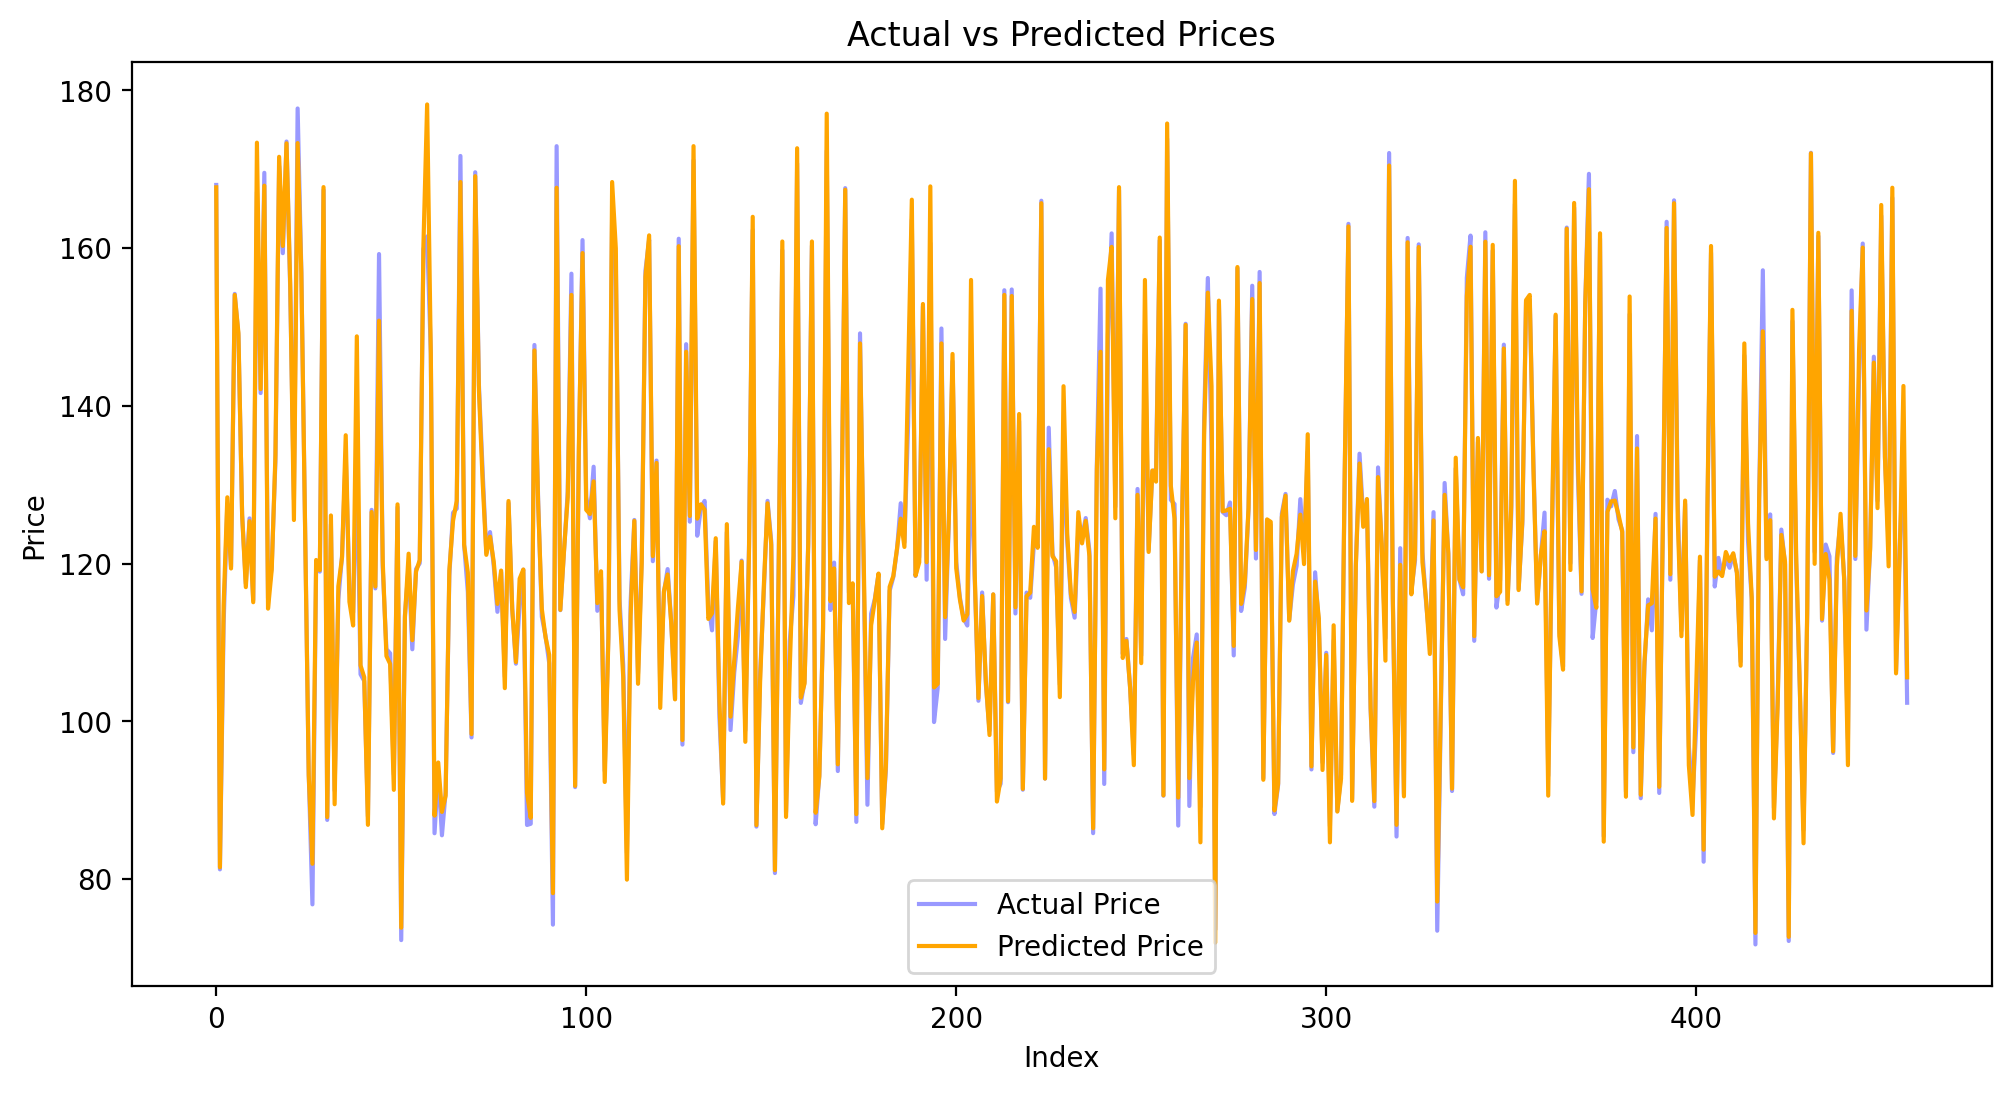

In [ ]:
#graphical analysis of actual price and predicted price with different colors for actual and predicted price

indices = range(len(y_test))
plt.figure(figsize=(12, 6))
plt.plot(indices, y_test, color='blue', label='Actual Price',alpha=0.4)
plt.plot(indices, y_predict_test_model1, color='orange', label='Predicted Price')
plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Actual vs Predicted Prices')
plt.legend()
plt.show()

# 2. Random Forest Regressor

RandomForestRegressor Model as the 2nd highest r2 score based on cross validation score according to its default hyperparameters

RandomForestRegressor() = 0.9881623402025117

In [ ]:
# loading the Random Forest Regressor model
rfr = RandomForestRegressor()

In [ ]:
# getting the best features of RFC by calling the feature selection function
best_score_rfr = 0
best_features_rfr = None
for i in range(X_train.shape[1]):
    col , score = find_best_feature(i+1,rfr,X_train,y_train)
    if best_score_rfr < score:
        best_score_rfr = score
        best_features_rfr = col
print(best_features_rfr)
print(best_score_rfr)

Selected columns:  ['SLV']
1 0.7814277282635995
----------------------

Selected columns:  ['SPX', 'SLV']
2 0.9689524822190083
----------------------

Selected columns:  ['SPX', 'USO', 'SLV']
3 0.9803342945759036
----------------------

Selected columns:  ['SPX', 'USO', 'SLV', 'EUR/USD']
4 0.9882965392846346
----------------------

['SPX', 'USO', 'SLV', 'EUR/USD']
0.9882965392846346


Best Features : ['SPX', 'USO', 'SLV', 'EUR/USD']

Best Score : 0.9882965392846346

In [ ]:
# using a diffferent df to store
X_train_best_features_rfr = X_train[best_features_rfr]

In [ ]:
# getting the cross val score of rfr with its best features
cv_score_rfr = cross_val_score(rfr, X_train_best_features_rfr, y_train, cv=5)
print(cv_score_rfr)
print(cv_score_rfr.mean())

[0.98921706 0.99023301 0.98446937 0.98551699 0.99056148]
0.9879995832687379


In [ ]:
# fitting the default model with its best features
rfr.fit(X_train_best_features_rfr,y_train)

RandomForestRegressor()

In [ ]:
# taking only best features of lr to test data
X_test_best_features_rfr = X_test[best_features_rfr]

In [ ]:
best_features_rfr

['SPX', 'USO', 'SLV', 'EUR/USD']

In [ ]:
# predicting the labels on test data
y_predict_rfr = rfr.predict(X_test_best_features_rfr)

In [ ]:
# calcuation the mae , mse , rmse , r2
mae_rfr = mean_absolute_error(y_test, y_predict_rfr)
mse_rfr = mean_squared_error(y_test, y_predict_rfr)
rmse_rfr = root_mean_squared_error(y_test, y_predict_rfr)
r2_rfr = r2_score(y_test, y_predict_rfr)

In [ ]:
print("Mean Absolute Error (MAE):", mae_rfr)
print("Mean Squared Error (MSE):",mse_rfr)
print("Root Mean Squared Error (RMSE):" ,rmse_rfr)
print("R-squared (R2):", r2_rfr)

Mean Absolute Error (MAE): 1.331075305480349
Mean Squared Error (MSE): 5.565320683078064
Root Mean Squared Error (RMSE): 2.3590931908422066
R-squared (R2): 0.9894484988891101


# Hyperparameter Tuning : Random Forest Regressor

In [ ]:
# parameters for Random Forest Regressor & fitting the data and model to grid search cv
params_rfr = {
    'n_estimators': [100, 200,300, 400],
    'max_depth': [10, 20, 30,40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
    }
grid_rfr = GridSearchCV(estimator=rfr, param_grid=params_rfr, cv=5, n_jobs=-1)
grid_rfr.fit(X_train_best_features_rfr, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, 40],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300, 400]})

In [ ]:
# getting the best hyperparameters
print(grid_rfr.best_estimator_, grid_rfr.best_params_, grid_rfr.best_score_)

RandomForestRegressor(max_depth=30, n_estimators=300) {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300} 0.9887224328784157


In [ ]:
# testing grid_rfr model on test data
y_predict_grid_rfr = grid_rfr.predict(X_test_best_features_rfr)

In [ ]:
# calcuation the mae , mse , rmse , r2
mae_grid_rfr = mean_absolute_error(y_test, y_predict_grid_rfr)
mse_grid_rfr = mean_squared_error(y_test, y_predict_grid_rfr)
rmse_grid_rfr = root_mean_squared_error(y_test, y_predict_grid_rfr)
r2_grid_rfr = r2_score(y_test, y_predict_grid_rfr)

print("Mean Absolute Error (MAE):", mae_grid_rfr)
print("Mean Squared Error (MSE):",mse_grid_rfr)
print("Root Mean Squared Error (RMSE):" ,rmse_grid_rfr)
print("R-squared (R2):", r2_grid_rfr)

Mean Absolute Error (MAE): 1.3327203508369787
Mean Squared Error (MSE): 5.643786536668565
Root Mean Squared Error (RMSE): 2.375665493428855
R-squared (R2): 0.9892997325217301


Best Parameters : {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}

# Final Model : Random Forest Regressor

In [ ]:
# loading the model with best hyper parameter
model2 = RandomForestRegressor(max_depth=30, n_estimators=300)

In [ ]:
# fitting the training data with best features of rfr
model2.fit(X_train_best_features_rfr,y_train)

RandomForestRegressor(max_depth=30, n_estimators=300)

# Model Evaluation : Random Forest Regressor

In [ ]:
# predicting the train data
y_predict_train_model2 = model2.predict(X_train_best_features_rfr)

In [ ]:
# calcuation the mae , mse , rmse , r2
mae_train_model2 = mean_absolute_error(y_train, y_predict_train_model2)
mse_train_model2 = mean_squared_error(y_train, y_predict_train_model2)
rmse_train_model2 = root_mean_squared_error(y_train, y_predict_train_model2)
r2_train_model2 = r2_score(y_train, y_predict_train_model2)

In [ ]:
print("Model2 on Training Data:")
print("Mean Absolute Error (MAE):", mae_train_model2)
print("Mean Squared Error (MSE):",mse_train_model2)
print("Root Mean Squared Error (RMSE):" ,rmse_train_model2)
print("R-squared (R2):", r2_train_model2)

Model2 on Training Data:
Mean Absolute Error (MAE): 0.48175843891376446
Mean Squared Error (MSE): 0.800112460201788
Root Mean Squared Error (RMSE): 0.8944900559546696
R-squared (R2): 0.9985331327054826


In [ ]:
# predicting the test data
y_predict_test_model2 = model2.predict(X_test_best_features_rfr)

In [ ]:
# calcuation the mae , mse , rmse , r2
mae_test_model2 = mean_absolute_error(y_test, y_predict_test_model2)
mse_test_model2 = mean_squared_error(y_test, y_predict_test_model2)
rmse_test_model2 = root_mean_squared_error(y_test, y_predict_test_model2)
r2_test_model2 = r2_score(y_test, y_predict_test_model2)

In [ ]:
print("Model2 on Test Data:")
print("Mean Absolute Error (MAE):", mae_test_model2)
print("Mean Squared Error (MSE):",mse_test_model2)
print("Root Mean Squared Error (RMSE):" ,rmse_test_model2)
print("R-squared (R2):", r2_test_model2)

Model2 on Test Data:
Mean Absolute Error (MAE): 1.3495740536244591
Mean Squared Error (MSE): 5.905267286750195
Root Mean Squared Error (RMSE): 2.430075572230254
R-squared (R2): 0.9888039813185062


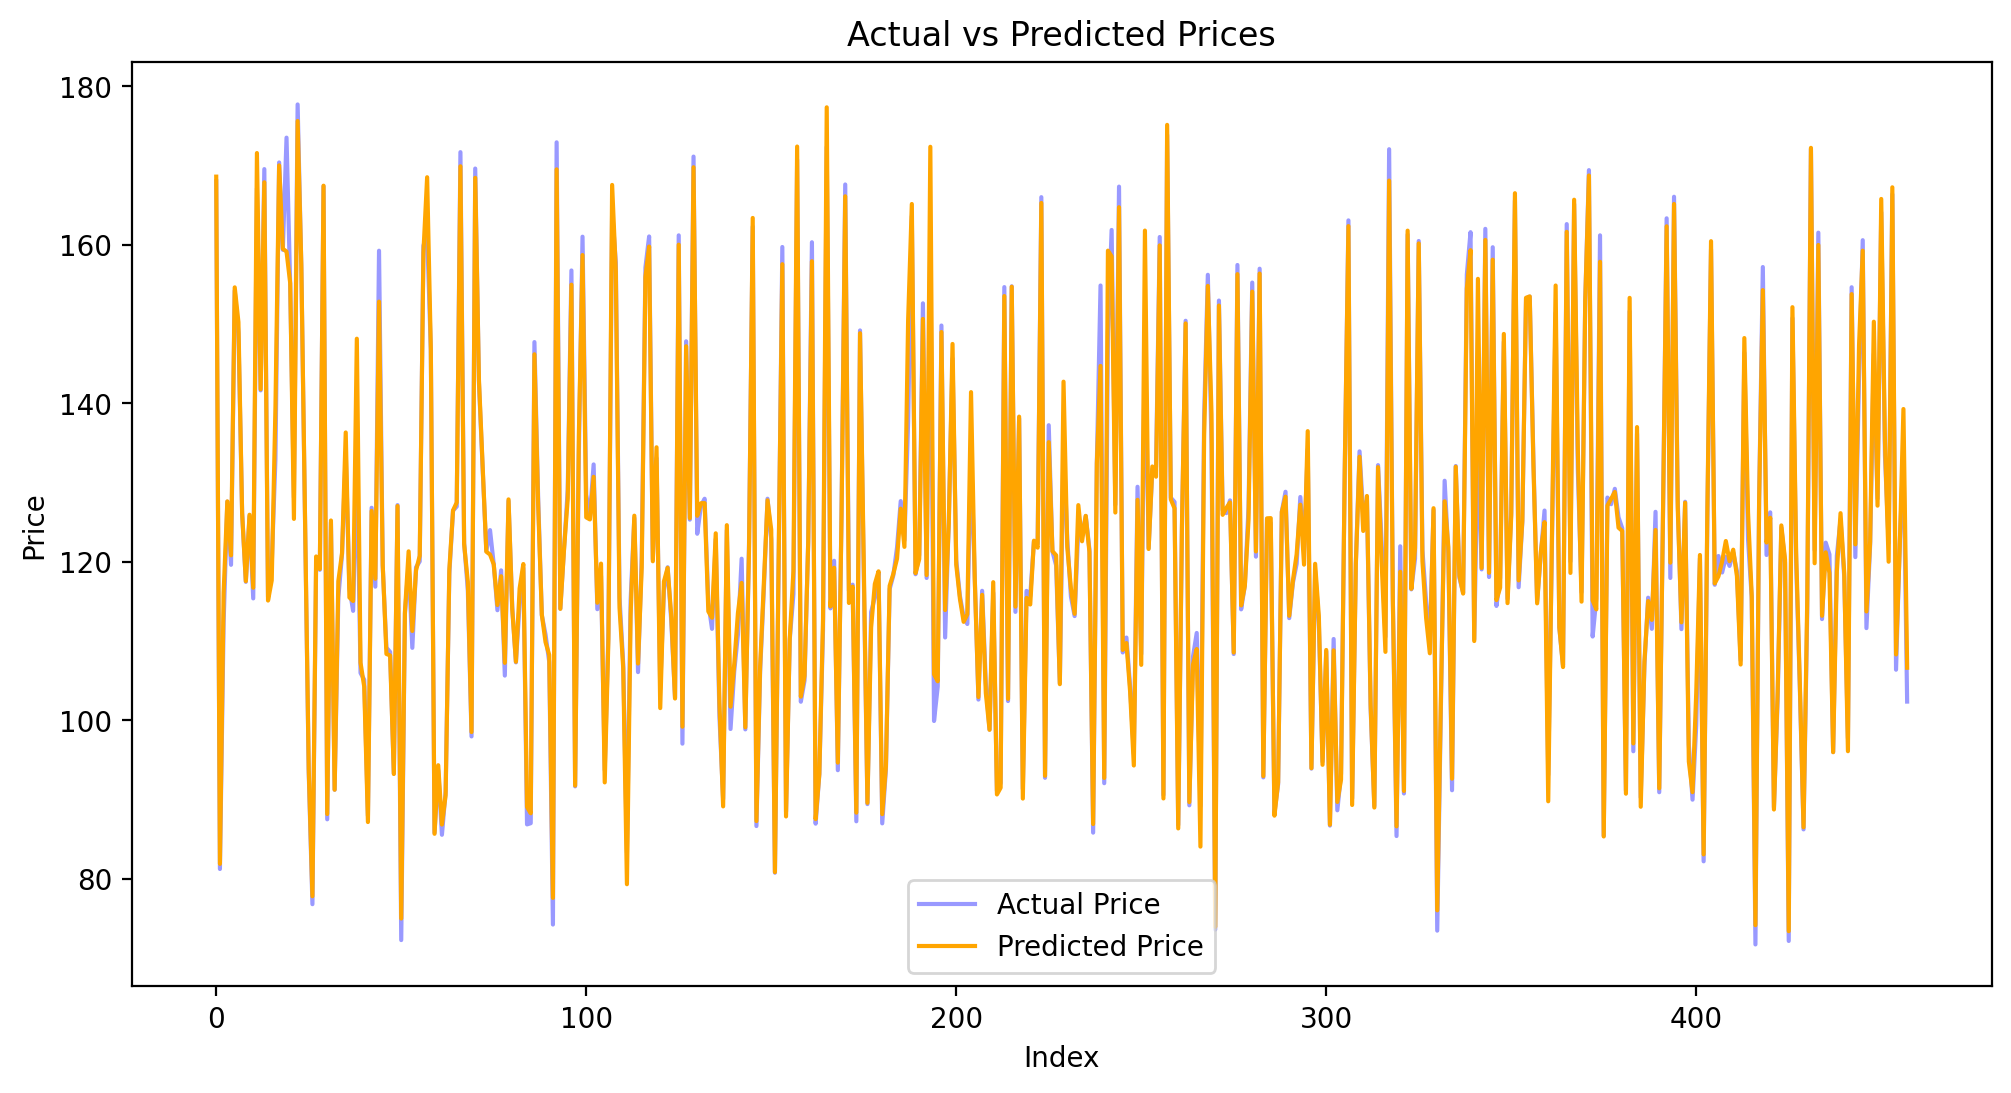

In [ ]:
#graphical analysis of actual price and predicted price with different colors for actual and predicted price

indices = range(len(y_test))
plt.figure(figsize=(12, 6))
plt.plot(indices, y_test, color='blue', label='Actual Price',alpha=0.4)
plt.plot(indices, y_predict_test_model2, color='orange', label='Predicted Price')
plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Actual vs Predicted Prices')
plt.legend()
plt.show()

# 3. XG Boost Regressor

XG Boost Regressor Model as the 3rd highest r2 based on cross validation score according to its default hyperparameters

XGBRegressor() = 0.9844608655890923

In [ ]:
# loading the XG Boost Regressor model
xgb = XGBRegressor()

In [ ]:
# getting the best features of XG Boost Regressor by calling the feature selection function
best_score_xgb = 0
best_features_xgb = None
for i in range(X_train.shape[1]):
    col , score = find_best_feature(i+1,xgb,X_train,y_train)
    if best_score_xgb < score:
        best_score_xgb = score
        best_features_xgb = col
print(best_features_xgb)
print(best_score_xgb)

Selected columns:  ['SLV']
1 0.8180510828183841
----------------------

Selected columns:  ['SPX', 'SLV']
2 0.9596482338628725
----------------------

Selected columns:  ['SPX', 'SLV', 'EUR/USD']
3 0.9814095077585613
----------------------

Selected columns:  ['SPX', 'USO', 'SLV', 'EUR/USD']
4 0.9844608655890923
----------------------

['SPX', 'USO', 'SLV', 'EUR/USD']
0.9844608655890923


Best Features : ['SPX', 'USO', 'SLV', 'EUR/USD']

Best Score : 0.9844608655890923

In [ ]:
# using a diffferent df to store
X_train_best_features_xgb = X_train[best_features_xgb]

In [ ]:
# getting the cross val score of xgb with its best features
cv_score_xgb = cross_val_score(xgb, X_train_best_features_xgb, y_train, cv=5)
print(cv_score_xgb)
print(cv_score_xgb.mean())

[0.98664106 0.98789291 0.97425347 0.98565841 0.98785848]
0.9844608655890923


In [ ]:
# fitting the default model with its best features
xgb.fit(X_train_best_features_xgb,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
# taking only best features of xgb to test data
X_test_best_features_xgb = X_test[best_features_xgb]

In [ ]:
best_features_xgb

['SPX', 'USO', 'SLV', 'EUR/USD']

In [ ]:
# predicting the labels on test data
y_predict_xgb = xgb.predict(X_test_best_features_xgb)

In [ ]:
# calcuation the mae , mse , rmse , r2
mae_xgb = mean_absolute_error(y_test, y_predict_xgb)
mse_xgb = mean_squared_error(y_test, y_predict_xgb)
rmse_xgb = root_mean_squared_error(y_test, y_predict_xgb)
r2_xgb = r2_score(y_test, y_predict_xgb)

In [ ]:
print("Mean Absolute Error (MAE):", mae_xgb)
print("Mean Squared Error (MSE):",mse_xgb)
print("Root Mean Squared Error (RMSE):" ,rmse_xgb)
print("R-squared (R2):", r2_xgb)

Mean Absolute Error (MAE): 1.4647312363547778
Mean Squared Error (MSE): 6.653740318488478
Root Mean Squared Error (RMSE): 2.579484506347824
R-squared (R2): 0.9873849231050468


# Hyperparameter Tuning : XG Boost Regressor

In [ ]:
# parameters for XG Boost Classifier
params_xgb = {
    'n_estimators': [300, 350, 400],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [1,2,3,4,5],
    }

In [ ]:
grid_xgb = GridSearchCV(estimator=xgb, param_grid=params_xgb, cv=5, n_jobs=-1)
grid_xgb.fit(X_train_best_features_xgb, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 1],
                         'max_depth': [1, 2, 3, 4, 5],
                         'n_estimators': [300, 350, 400]})

In [ ]:
# getting the best hyperparameters
print(grid_xgb.best_estimator_, grid_xgb.best_params_, grid_xgb.best_score_)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=400, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...) {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 400} 0.9868639457184288


In [ ]:
# testing grid_xgb model on test data
y_predict_grid_xgb = grid_xgb.predict(X_test_best_features_xgb)

In [ ]:
# calcuation the mae , mse , rmse , r2
mae_grid_xgb = mean_absolute_error(y_test, y_predict_grid_xgb)
mse_grid_xgb = mean_squared_error(y_test, y_predict_grid_xgb)
rmse_grid_xgb = root_mean_squared_error(y_test, y_predict_grid_xgb)
r2_grid_xgb = r2_score(y_test, y_predict_grid_xgb)

print("Mean Absolute Error (MAE):", mae_grid_xgb)
print("Mean Squared Error (MSE):",mse_grid_xgb)
print("Root Mean Squared Error (RMSE):" ,rmse_grid_xgb)
print("R-squared (R2):", r2_grid_xgb)

Mean Absolute Error (MAE): 1.6032111006616319
Mean Squared Error (MSE): 7.094653539730615
Root Mean Squared Error (RMSE): 2.663579084564717
R-squared (R2): 0.986548979121102


Best Parameters : {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 400}

# Final Model : XG Boost Regressor

In [ ]:
# loading the model with best hyper parameter
model3 = XGBRegressor(learning_rate= 0.1, max_depth= 4, n_estimators= 400)

In [ ]:
# fitting the training data with best features of rfr
model3.fit(X_train_best_features_xgb,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=400, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

# Model Evaluation : XG Boost Regressor

In [ ]:
# predicting the train data
y_predict_train_model3 = model3.predict(X_train_best_features_xgb)

In [ ]:
# calcuation the mae , mse , rmse , r2
mae_train_model3 = mean_absolute_error(y_train, y_predict_train_model3)
mse_train_model3 = mean_squared_error(y_train, y_predict_train_model3)
rmse_train_model3 = root_mean_squared_error(y_train, y_predict_train_model3)
r2_train_model3 = r2_score(y_train, y_predict_train_model3)

In [ ]:
print("Model3 on Training Data:")
print("Mean Absolute Error (MAE):", mae_train_model3)
print("Mean Squared Error (MSE):",mse_train_model3)
print("Root Mean Squared Error (RMSE):" ,rmse_train_model3)
print("R-squared (R2):", r2_train_model3)

Model3 on Training Data:
Mean Absolute Error (MAE): 0.6862679305643805
Mean Squared Error (MSE): 0.9188833853583506
Root Mean Squared Error (RMSE): 0.9585840523179752
R-squared (R2): 0.9983153868330988


In [ ]:
# predicting the test data
y_predict_test_model3 = model3.predict(X_test_best_features_xgb)

In [ ]:
# calcuation the mae , mse , rmse , r2
mae_test_model3 = mean_absolute_error(y_test, y_predict_test_model3)
mse_test_model3 = mean_squared_error(y_test, y_predict_test_model3)
rmse_test_model3 = root_mean_squared_error(y_test, y_predict_test_model3)
r2_test_model3 = r2_score(y_test, y_predict_test_model3)

In [ ]:
print("Model3 on Test Data:")
print("Mean Absolute Error (MAE):", mae_test_model3)
print("Mean Squared Error (MSE):",mse_test_model3)
print("Root Mean Squared Error (RMSE):" ,rmse_test_model3)
print("R-squared (R2):", r2_test_model3)

Model3 on Test Data:
Mean Absolute Error (MAE): 1.6032111006616319
Mean Squared Error (MSE): 7.094653539730615
Root Mean Squared Error (RMSE): 2.663579084564717
R-squared (R2): 0.986548979121102


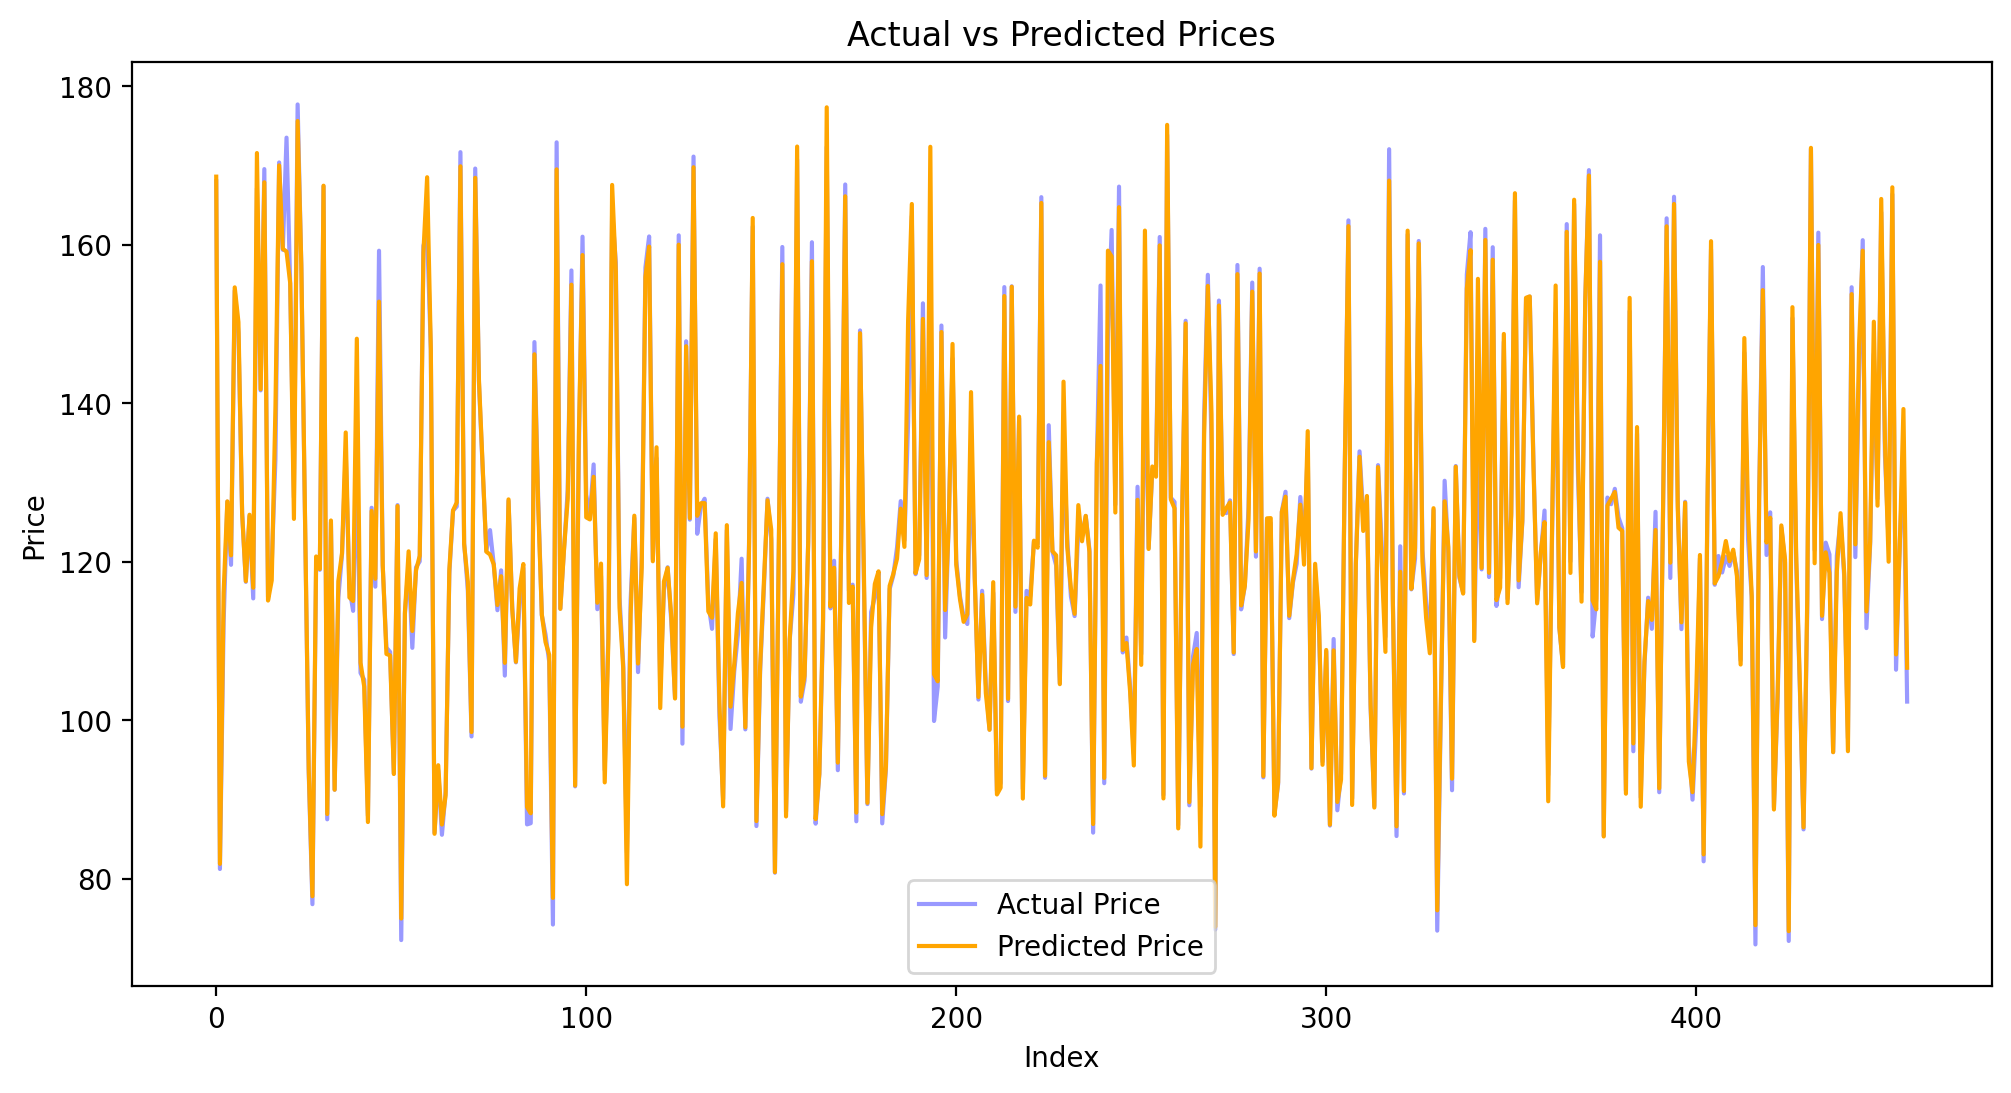

In [ ]:
#graphical analysis of actual price and predicted price with different colors for actual and predicted price

indices = range(len(y_test))
plt.figure(figsize=(12, 6))
plt.plot(indices, y_test, color='blue', label='Actual Price',alpha=0.4)
plt.plot(indices, y_predict_test_model2, color='orange', label='Predicted Price')
plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Actual vs Predicted Prices')
plt.legend()
plt.show()

# Conclusion

Model 1 : K Neighbors Regressor

Training Data R2 score : 0.99687

Testing Data R2 score : 0.98934

Model 2 : Random Forest Regressor

Training Data R2 score : 0.99853

Testing Data R2 score : 0.98880

Model 3 : XG Boost Regressor

Training Data R2 score : 0.99831

Testing Data R2 score : 0.98654

# Predictive System

Buliding a Predictive System for here

In [ ]:
#taking input data 89.139999
input_data = (1390.839966,105.919998,17.264999,1.551807)

#loading columns
columns = all_columns

# Convert the tuple to a DataFrame
df = pd.DataFrame([input_data], columns=columns)

#standardizing the data
df[columns] = scaler.transform(df[columns])

#loading best features
df_best_features_knr = df[best_features_knr]
df_best_features_rfr = df[best_features_rfr]
df_best_features_xgb = df[best_features_xgb]

#predictions
prediction1 = model1.predict(df_best_features_knr)
prediction2 = model2.predict(df_best_features_rfr)
prediction3 = model3.predict(df_best_features_xgb)


print(prediction1)

print(prediction2)

print(prediction3)


[88.97333267]
[89.03509903]
[89.17878]


Building the Predictive System to export

In [ ]:
import json
import pickle
with open('columns.pkl', 'wb') as file:
    pickle.dump(all_columns, file)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
with open('best_features_knr.json', 'w') as file:
    json.dump(best_features_knr, file)
with open('best_features_rfr.json', 'w') as file:
    json.dump(best_features_rfr, file)
with open('best_features_xgb.json', 'w') as file:
    json.dump(best_features_xgb, file)
with open('gold_price_prediction_trained_knr_model.sav', 'wb') as f:
    pickle.dump(model1, f)
with open('gold_price_prediction_trained_rfr_model.sav', 'wb') as f:
    pickle.dump(model2, f)
with open('gold_price_prediction_trained_xgb_model.sav', 'wb') as f:
    pickle.dump(model3, f)

In [ ]:
#loading. the saved model
with open('columns.pkl', 'rb') as f:
    all_features = pickle.load(f)
with open('scaler.pkl', 'rb') as f:
    scalers = pickle.load(f)
with open('best_features_knr.json', 'r') as file:
    best_features_knr = json.load(file)
with open('best_features_rfr.json', 'r') as file:
    best_features_rfr = json.load(file)
with open('best_features_xgb.json', 'r') as file:
    best_features_xgb = json.load(file)
with open('gold_price_prediction_trained_knr_model.sav', 'rb') as f:
    loaded_model_knr = pickle.load(f)
with open('gold_price_prediction_trained_rfr_model.sav', 'rb') as f:
    loaded_model_rfr = pickle.load(f)
with open('gold_price_prediction_trained_xgb_model.sav', 'rb') as f:
    loaded_model_xgb = pickle.load(f)

In [ ]:
#taking input data 117.639999
input_data = (1928.209961,32.110001,16.620001,1.268907)

# Convert the tuple to a DataFrame
df = pd.DataFrame([input_data], columns=all_features)

#loading columns
df[all_features] = scalers.transform(df[all_features])

#loading best features
df_best_features_knr = df[best_features_knr]
df_best_features_rfr = df[best_features_rfr]
df_best_features_xgb = df[best_features_xgb]

#predictions
prediction1 = loaded_model_knr.predict(df_best_features_knr)
prediction2 = loaded_model_rfr.predict(df_best_features_rfr)
prediction3 = loaded_model_xgb.predict(df_best_features_xgb)

print(prediction1)

print(prediction2)

print(prediction3)


[118.72666433]
[118.20223199]
[118.2668]
